In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.core.display import HTML
import pyAgrum.causal as csl
import pandas as pd
import pyAgrum.lib.explain as explain
import pyAgrum.lib.bn_vs_bn as bnvsbn
import pyAgrum.causal.notebook as cslnb


### Import network Assignment 1

In [2]:
network= gum.loadBN("networks/assignment1.bif")

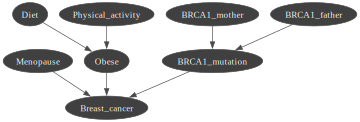

In [3]:
gnb.show(network)

### Save samples to disk

In [4]:
sample_sizes = [100, 500, 1000, 5000, 10000]
generator = gum.BNDatabaseGenerator(network)
generator.setRandomVarOrder()
generator.drawSamples(max(sample_sizes))
df = generator.to_pandas()

In [5]:
df.head()

,Diet,Physical_activity,Obese,BRCA1_father,Breast_cancer,BRCA1_mutation,Menopause,BRCA1_mother
0,Healthy,Regular,No,No,No,No,Before,No
1,Normal,Little,No,No,No,No,After,No
2,Healthy,Regular,No,No,No,No,Before,No
3,Normal,Regular,No,No,No,No,Before,No
4,Normal,Regular,No,No,No,No,Before,No


In [6]:
for sample_size in sample_sizes:
    df.sample(sample_size).to_csv(f'data/sample_{sample_size}_assignment1.csv', index=False)

## Learning the network's topology from data
### Score based approach: Greedy hill climb algorithm

In [11]:
score_networks = {}

for sample_size in sample_sizes:
    learner=gum.BNLearner(f"data/sample_{sample_size}_assignment1.csv") 
    learner.useGreedyHillClimbing()
    score_networks[sample_size] = learner.learnBN()
    print(f"Learned network from {sample_size} samples in {1000*learner.currentTime()}ms")
    # gnb.flow.add(network, caption="Original network")
    gnb.flow.add(gnb.getBNDiff(network,score_networks[sample_size],size="8!"),f"{sample_size} samples diff with original")
    gnb.flow.add(bnvsbn.graphDiffLegend())
    gnb.flow.display()

Learned network from 100 samples in 2.812ms


Learned network from 500 samples in 4.7153ms


Learned network from 1000 samples in 4.8113ms


Learned network from 5000 samples in 8.58ms


Learned network from 10000 samples in 9.8885ms


### Constraint based approach: MIIC algorithm

In [12]:
constraint_networks = {}

for sample_size in sample_sizes:
    learner=gum.BNLearner(f"data/sample_{sample_size}_assignment1.csv") 
    learner.useMIIC()
    constraint_networks[sample_size] = learner.learnBN()
    print(f"Learned network from {sample_size} samples in {1000*learner.currentTime()}ms")
    # gnb.flow.add(network, caption="Original network")
    gnb.flow.add(gnb.getBNDiff(network,constraint_networks[sample_size],size="8!"),f"{sample_size} samples diff with original")
    gnb.flow.add(bnvsbn.graphDiffLegend())
    gnb.flow.display()

Learned network from 100 samples in 2.8215ms


Learned network from 500 samples in 5.5822ms


Learned network from 1000 samples in 8.3065ms


Learned network from 5000 samples in 14.1737ms


Learned network from 10000 samples in 19.4201ms
